In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importando dados de casos confirmados
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933


In [4]:
# Quantidade de linhas e colunas
confirmed.shape

(275, 494)

In [5]:
# Mostrar uma coluna específica
confirmed["Country/Region"]

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
270               Vietnam
271    West Bank and Gaza
272                 Yemen
273                Zambia
274              Zimbabwe
Name: Country/Region, Length: 275, dtype: object

In [6]:
last_date = "3/25/21"
confirmed[last_date]

0       56226
1      122767
2      116543
3       11687
4       21914
        ...  
270      2579
271    232038
272      3816
273     87318
274     36778
Name: 3/25/21, Length: 275, dtype: int64

In [7]:
# Países/Regiões atingidos
confirmed["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [8]:
# Pegar a primeira linha do dataset
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                   33.9391
Long                    67.71
1/22/20                     0
                     ...     
5/21/21                 65080
5/22/21                 65486
5/23/21                 65728
5/24/21                 66275
5/25/21                 66903
Name: 0, Length: 494, dtype: object

In [9]:
# Colocar Province/State como index e procurar por "Anhui"
confirmed.set_index("Province/State").loc["Anhui"]

Country/Region      China
Lat               31.8257
Long              117.226
1/22/20                 1
1/23/20                 9
                   ...   
5/21/21              1001
5/22/21              1002
5/23/21              1002
5/24/21              1004
5/25/21              1004
Name: Anhui, Length: 493, dtype: object

Dica: loc localiza pelo indice e iloc localiza pela linha

In [10]:
# Contar os valores
# Não podemos considerar essa análise, pois contém muitos campos vazios (muita disparidade no padrão)
confirmed["Country/Region"].value_counts()

China              34
Canada             16
United Kingdom     12
France             12
Australia           8
                   ..
Czechia             1
Serbia              1
Mauritius           1
North Macedonia     1
Kuwait              1
Name: Country/Region, Length: 192, dtype: int64

In [11]:
# Número de pessoas confirmadas por país
confirmed_by_country = confirmed.groupby("Country/Region").sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933


In [12]:
confirmed_by_country.loc["Brazil"]

Lat       -1.423500e+01
Long      -5.192530e+01
1/22/20    0.000000e+00
1/23/20    0.000000e+00
1/24/20    0.000000e+00
               ...     
5/21/21    1.597095e+07
5/22/21    1.604744e+07
5/23/21    1.608326e+07
5/24/21    1.612076e+07
5/25/21    1.619421e+07
Name: Brazil, Length: 492, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

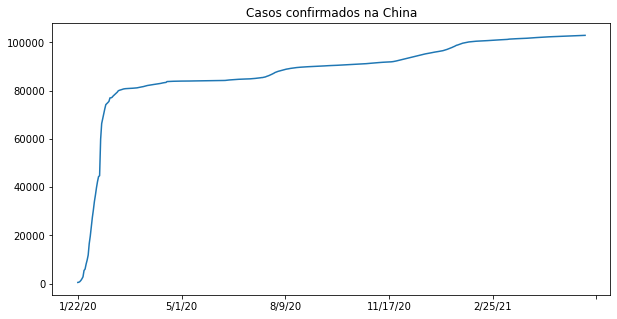

In [13]:
# Pegando o valor dois em diante (ignora lat e long)
plt.figure(figsize = (10,5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados na China")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

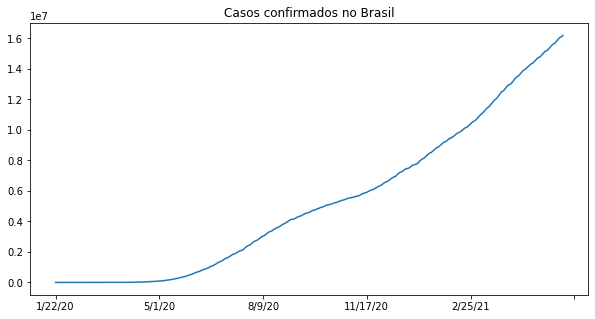

In [14]:
plt.figure(figsize = (10,5))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.title("Casos confirmados no Brasil")
plt.show

Text(0.5, 1.0, 'Novos casos na China')

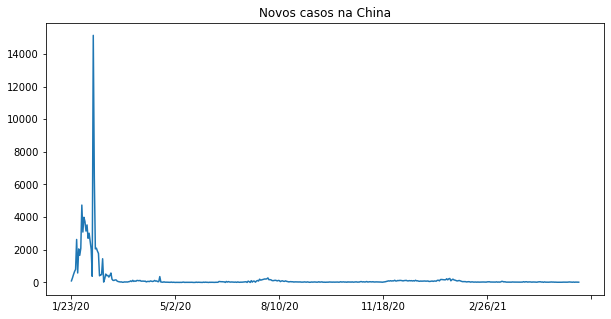

In [15]:
# Mostrando o número de novos casos (diferença um dia para o outro)
plt.figure(figsize = (10,5))
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()
new_cases_china.plot()
plt.title("Novos casos na China")

Text(0.5, 1.0, 'Novos casos no Brasil')

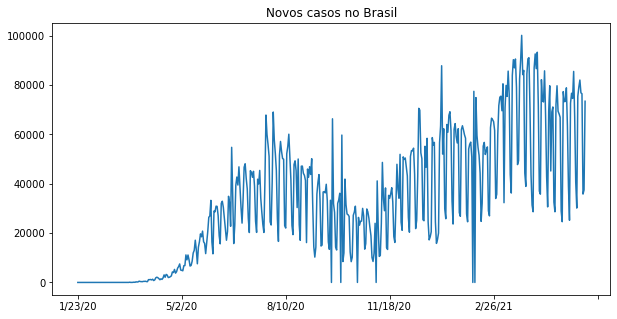

In [16]:
plt.figure(figsize = (10,5))
new_cases_brazil = confirmed_by_country.loc["Brazil"][2:].diff().dropna()
new_cases_brazil.plot()
plt.title("Novos casos no Brasil")

Text(0.5, 1.0, 'Países com maior número de casos confirmados')

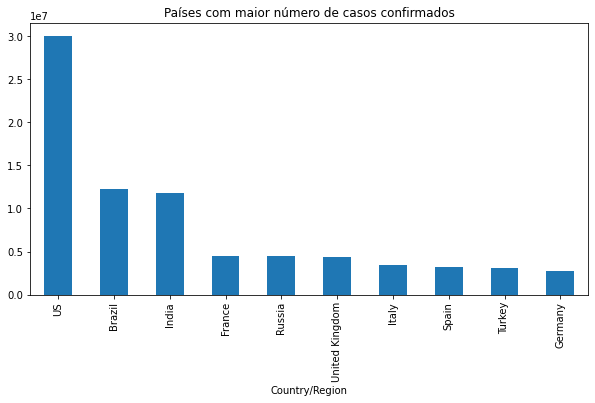

In [17]:
plt.figure(figsize = (10,5))
confirmed_by_country[last_date].sort_values(ascending = False)[0:10].plot(kind = 'bar')
plt.title("Países com maior número de casos confirmados")

In [18]:
# Dados de mortes e casos recuperados de Covid-19
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2742,2745,2751,2762,2772,2782,2792,2802,2812,2836
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2432,2435,2436,2438,2440,2441,2442,2444,2445,2447
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3374,3381,3388,3395,3401,3405,3411,3418,3426,3433
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,659,677,685,696,704,709,715,725,731,735


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,54686,55010,55118,55529,55687,55790,55889,56035,56295,56518
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,124312,125419,126405,127240,127869,128425,128601,128732,128826,128907
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87359,87476,87609,87746,87902,88066,88208,88346,88497,88672
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13155,13211,13234,13234,13234,13234,13234,13234,13234,13263
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,25715,25995,26013,26458,26483,26513,26775,26778,27087,27204


## Começando a trabalhar com as três fontes de dados (confirmed, deaths e recovered)

In [19]:
# Função que retorna os últimos dados dos países
# Como pegar a última coluna
def latest_by_country(data):
    return data.groupby("Country/Region").sum().iloc[:,-1]

In [20]:
latest_data = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(latest_data, axis = 1)
combined.columns = ["confirmed", "deaths", "recovered"]
combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,66903,2836,56518
Albania,132229,2447,128907
Algeria,127361,3433,88672
Andorra,13664,127,13263
Angola,32933,735,27204


In [21]:
# A Taxa de Letalidade é expressa em porcentagem
sum_up = combined.sum()
lethality_rate_1 = (sum_up["deaths"] / sum_up["confirmed"])
lethality_rate_2 = sum_up["deaths"] / (sum_up["confirmed"] + sum_up["deaths"])
print(lethality_rate_1 * 100)
print(lethality_rate_2 * 100)

2.0767502398968163
2.0344987815698663


In [22]:
lethality_rate_1 = combined["deaths"] / combined["confirmed"] * 100
lethality_rate_2 = combined["deaths"] / (combined["confirmed"] + combined["deaths"]) * 100
combined["lethality_rate_1"] = lethality_rate_1
combined["lethality_rate_2"] = lethality_rate_2
combined.head()

,confirmed,deaths,recovered,lethality_rate_1,lethality_rate_2
Country/Region,,,,,
Afghanistan,66903,2836,56518,4.238973,4.066591
Albania,132229,2447,128907,1.850577,1.816953
Algeria,127361,3433,88672,2.695488,2.624738
Andorra,13664,127,13263,0.929450,0.920890
Angola,32933,735,27204,2.231804,2.183082


In [23]:
# Ordenar pela letalidade
combined.sort_values("lethality_rate_1", ascending = False).head(10)

,confirmed,deaths,recovered,lethality_rate_1,lethality_rate_2
Country/Region,,,,,
Vanuatu,4,1,3,25.000000,20.000000
MS Zaandam,9,2,7,22.222222,18.181818
Yemen,6670,1311,3273,19.655172,16.426513
Mexico,2399790,221960,1917958,9.249143,8.466101
Sudan,34889,2600,27949,7.452206,6.935368
Syria,24252,1745,21569,7.195283,6.712313
Egypt,256124,14807,187691,5.781184,5.465229
Somalia,14632,767,6685,5.241935,4.980843
Ecuador,420167,20227,366425,4.814038,4.592933


<AxesSubplot:xlabel='confirmed', ylabel='lethality_rate_1'>

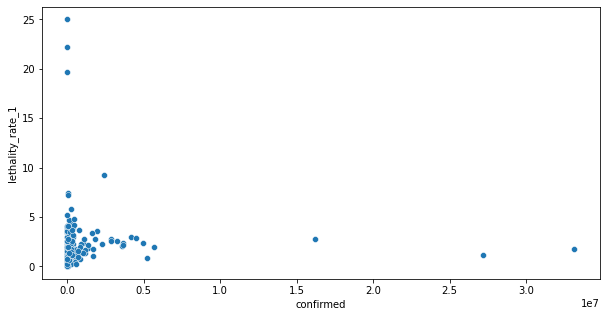

In [24]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = combined, x="confirmed", y="lethality_rate_1")

<AxesSubplot:xlabel='confirmed', ylabel='lethality_rate_1'>

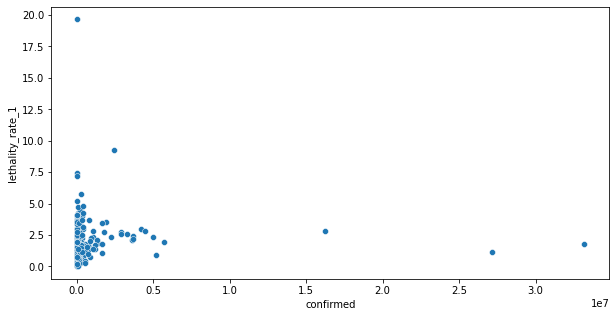

In [25]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = combined.query("confirmed > 40"), x="confirmed", y="lethality_rate_1")

<AxesSubplot:xlabel='confirmed', ylabel='lethality_rate_2'>

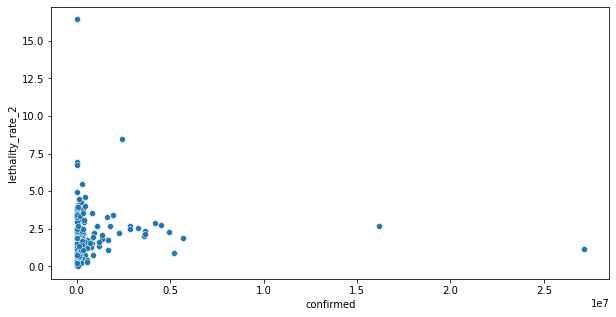

In [26]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = combined.query("recovered > 40"), x="confirmed", y="lethality_rate_2")

<AxesSubplot:xlabel='lethality_rate_1', ylabel='Count'>

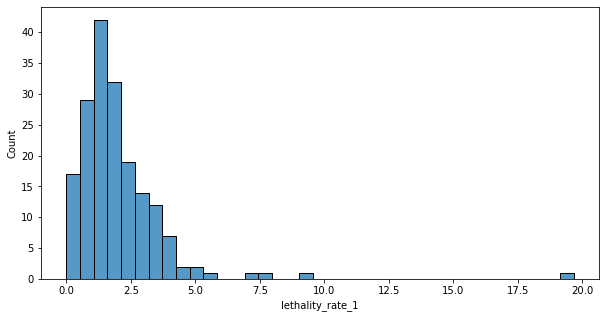

In [27]:
plt.figure(figsize = (10,5))
sns.histplot(combined.query("recovered > 40")["lethality_rate_1"])

<AxesSubplot:xlabel='lethality_rate_1', ylabel='Count'>

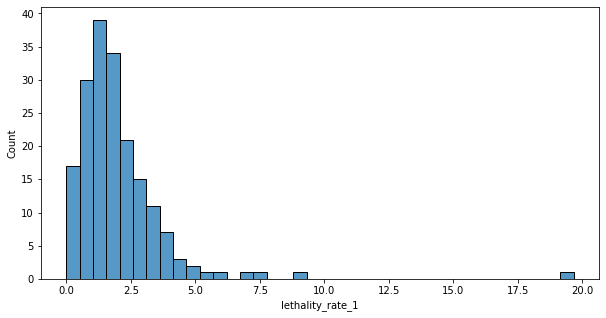

In [28]:
plt.figure(figsize = (10,5))
sns.histplot(combined.query("confirmed > 40")["lethality_rate_1"])

<AxesSubplot:xlabel='lethality_rate_2', ylabel='Count'>

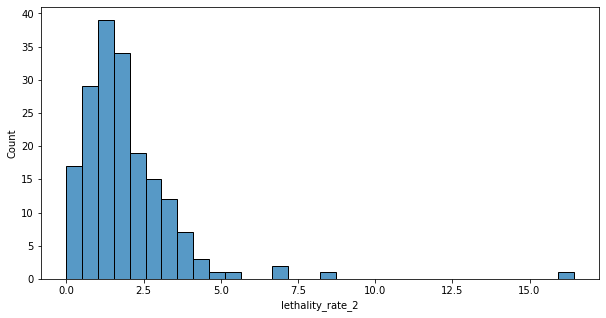

In [29]:
plt.figure(figsize = (10,5))
sns.histplot(combined.query("recovered > 40")["lethality_rate_2"])

In [30]:
combined.sort_values("lethality_rate_1", ascending=False).query("confirmed > 40").head(10)

,confirmed,deaths,recovered,lethality_rate_1,lethality_rate_2
Country/Region,,,,,
Yemen,6670,1311,3273,19.655172,16.426513
Mexico,2399790,221960,1917958,9.249143,8.466101
Sudan,34889,2600,27949,7.452206,6.935368
Syria,24252,1745,21569,7.195283,6.712313
Egypt,256124,14807,187691,5.781184,5.465229
Somalia,14632,767,6685,5.241935,4.980843
Ecuador,420167,20227,366425,4.814038,4.592933
China,102905,4846,97672,4.709198,4.497406
Bosnia and Herzegovina,203513,9168,173187,4.504872,4.310681


## Comparando relatórios

In [31]:
def latest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]


latest_data = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(latest_data, axis=1)
combined_2_20_20.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_2_20_20.loc["China"]
lethality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
lethality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(lethality_rate_1 * 100)
print(lethality_rate_2 * 100)

2.980939568709458
11.050760418724076


In [32]:
# Usando estimativa de 12 dias como período médio entre confirmação e morte ou recuperação
latest_data = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(latest_data, axis=1)
combined_12.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_12.loc["China"]
lethality_rate_3 = sum_up["deaths"] / sum_up["confirmed"]
print(lethality_rate_3 * 100)
display(sum_up)

6.079208996577389


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64

# Segunda parte

In [33]:
confirmed.set_index("Country/Region").loc["China"].sum().tail()

5/21/21    102833
5/22/21    102853
5/23/21    102873
5/24/21    102890
5/25/21    102905
dtype: object

## Comparando China com o resto do mundo

In [34]:
is_china = confirmed["Country/Region"] == "China"
is_china.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [35]:
# Adicionando uma nova coluna
confirmed["is_china"] = is_china
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,is_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,63598,63819,64122,64575,65080,65486,65728,66275,66903,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132032,132071,132095,132118,132153,132176,132209,132215,132229,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,125485,125693,125896,126156,126434,126651,126860,127107,127361,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13555,13569,13569,13569,13569,13569,13569,13569,13664,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,30787,31045,31438,31661,31909,32149,32441,32623,32933,False


In [36]:
# Mostrando somente valores da China
confirmed.query("is_china").head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,is_china
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,1001,1001,1001,1001,1001,1002,1002,1004,1004,True
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,1057,1057,1057,1057,1057,1058,1058,1058,1058,True
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,598,598,598,598,598,598,598,598,598,True
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,599,599,599,610,610,612,613,615,616,True
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,193,193,193,193,193,193,194,194,194,True


<AxesSubplot:xlabel='is_china'>

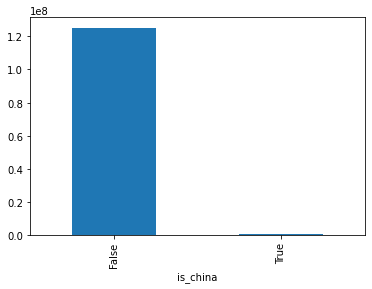

In [44]:
# Agrupando por 'is_china' e comparando com o resto dos locais
confirmed.groupby("is_china").sum()[last_date].plot(kind = 'bar')

In [41]:
import numpy as np

# onde for verdadeiro, devolver "China". Se for falso, devolver "Outros"
confirmed['is_china_label'] = np.where(confirmed["is_china"], 'China', 'Others')
display(confirmed.head())
display(confirmed.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,is_china,is_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,63819,64122,64575,65080,65486,65728,66275,66903,False,Others
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132071,132095,132118,132153,132176,132209,132215,132229,False,Others
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,125693,125896,126156,126434,126651,126860,127107,127361,False,Others
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13569,13569,13664,False,Others
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31045,31438,31661,31909,32149,32441,32623,32933,False,Others


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,is_china,is_china_label
270,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4512,4720,4809,4941,5119,5275,5404,5931,False,Others
271,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304074,304532,304532,304968,305201,305201,305777,306334,False,Others
272,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6586,6593,6613,6632,6649,6658,6662,6670,False,Others
273,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92520,92630,92754,92920,93106,93201,93279,93428,False,Others
274,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,38595,38612,38635,38664,38679,38682,38696,38706,False,Others


Text(0.5, 1.0, 'Casos confirmados acumulados até 3/25/21')

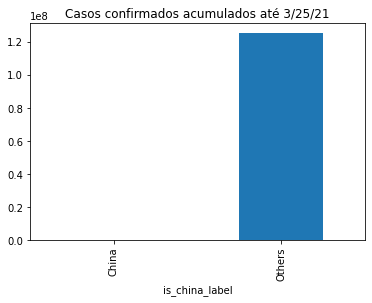

In [45]:
confirmed.groupby("is_china_label").sum()[last_date].plot(kind='bar')
plt.title(f"Casos confirmados acumulados até {last_date}")

### Analisando o crescimento dos casos

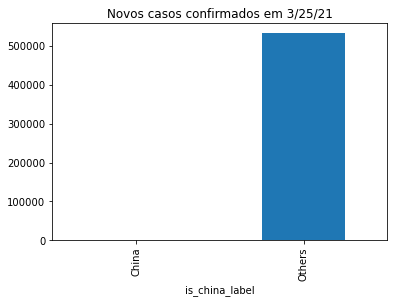

In [46]:
summed = confirmed.groupby("is_china_label").sum()
summed["delta"] = summed["5/25/21"] - summed["5/24/21"] # pegando os novos casos entre duas datas
summed["delta"].plot(kind='bar')
plt.title(f"Novos casos confirmados em {last_date}")
plt.show()

In [49]:
# trocar linha e coluna de lugar
summed.T.head()

is_china_label,China,Others
Lat,1085.2923,4520.709250
Long,3688.9377,2597.745414
1/22/20,548.0000,9.000000
1/23/20,643.0000,12.000000
1/24/20,920.0000,21.000000


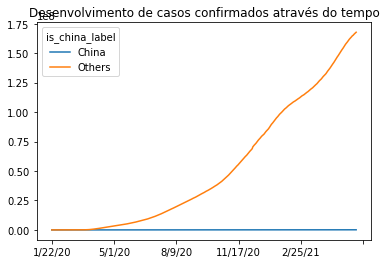

In [54]:
summed.T[2:-2].plot()
plt.title("Desenvolvimento de casos confirmados através do tempo")
plt.show()

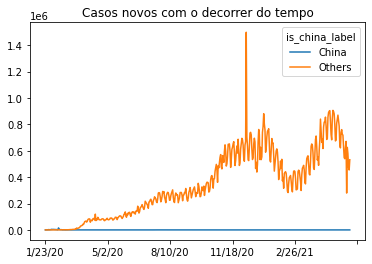

In [62]:
differences = summed.T[2:-2].diff().dropna()
differences.plot()
plt.title("Casos novos com o decorrer do tempo")
plt.show()